In [116]:
import pandas as pd
import numpy as np
import os
import json
import glob
import re
from matplotlib import pyplot as plt
from monty.serialization import loadfn
from sklearn.metrics import r2_score 
from scipy import stats

In [2]:
data_dir = "./DeltaQFastCharge/"
file_list = glob.glob(os.path.join(data_dir, '*.json'))
file_list[:5]

['./DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH00_features_DeltaQFastCharge.json',
 './DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH01_features_DeltaQFastCharge.json',
 './DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH02_features_DeltaQFastCharge.json',
 './DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH03_features_DeltaQFastCharge.json',
 './DeltaQFastCharge\\LFP_15C_0-100_0.5-1C_a_CH04_features_DeltaQFastCharge.json']

In [3]:
# data_dir = "./DeltaQFastCharge/"
# file_list = glob.glob(os.path.join(data_dir, '*.json'))

delta_df = pd.DataFrame()
for f in file_list:
    with open(f) as fp:
        data = json.load(fp)
        for k in data['X'].keys():
            data['X'][k] = data['X'][k][0]
        delta_df = delta_df.append(pd.Series(data['X']), ignore_index=True)
delta_df.head()

,abs_first_discharge_capacity_difference_cycles_2:100,abs_kurtosis_discharge_capacity_difference_cycles_2:100,abs_mean_discharge_capacity_difference_cycles_2:100,abs_min_discharge_capacity_difference_cycles_2:100,abs_skew_discharge_capacity_difference_cycles_2:100,abs_variance_discharge_capacity_difference_cycles_2:100,charge_time_cycles_1:5,discharge_capacity_cycle_100,discharge_capacity_cycle_2,integrated_time_temperature_cycles_1:100,...,intercept_discharge_capacity_cycle_number_91:100,internal_resistance_cycle_2,internal_resistance_difference_cycles_2:100,max_discharge_capacity_difference,max_temperature_cycles_1:100,min_internal_resistance_cycles_2:100,min_temperature_cycles_1:100,nominal_capacity_by_median,slope_discharge_capacity_cycle_number_2:100,slope_discharge_capacity_cycle_number_91:100
0,-3.309824,1.867028,-2.742859,-0.446806,0.584775,-3.166992,5760.000000,1.032,1.030,306697.588291,...,1.032000,NaN,NaN,1.035,18.459000,NaN,15.160000,1.033,-0.000595,1.217792e-17
1,-3.019408,2.349816,-2.648706,-0.208776,0.993881,-3.056759,5785.600098,1.042,1.040,296427.402899,...,1.042000,NaN,NaN,1.043,16.705999,NaN,15.281000,1.044,-0.000603,-5.691578e-18
2,-2.312774,1.694375,-1.917594,-0.195631,0.655882,-2.478396,5811.200195,1.030,1.030,262556.750559,...,1.030000,NaN,NaN,1.029,20.877001,NaN,15.107000,1.031,-0.000596,1.727324e-17
3,-2.677882,1.495850,-2.076420,-0.631730,0.057256,-2.981589,5785.600098,1.025,1.029,268508.727464,...,1.025000,NaN,NaN,1.026,22.084999,NaN,15.306000,1.028,-0.000626,1.943125e-18
4,-2.005443,0.393445,-1.682799,-0.189399,-0.220132,-1.291194,5785.600098,1.059,1.067,614925.496456,...,1.068364,NaN,NaN,1.074,25.669001,NaN,24.084999,1.067,-0.000724,-9.696970e-05


In [4]:
delta_df.isna().sum(axis=0)

abs_first_discharge_capacity_difference_cycles_2:100        9
abs_kurtosis_discharge_capacity_difference_cycles_2:100     9
abs_mean_discharge_capacity_difference_cycles_2:100         0
abs_min_discharge_capacity_difference_cycles_2:100          0
abs_skew_discharge_capacity_difference_cycles_2:100         9
abs_variance_discharge_capacity_difference_cycles_2:100     0
charge_time_cycles_1:5                                      0
discharge_capacity_cycle_100                                0
discharge_capacity_cycle_2                                  0
integrated_time_temperature_cycles_1:100                    0
intercept_discharge_capacity_cycle_number_2:100             0
intercept_discharge_capacity_cycle_number_91:100            0
internal_resistance_cycle_2                                30
internal_resistance_difference_cycles_2:100                30
max_discharge_capacity_difference                           0
max_temperature_cycles_1:100                                2
min_inte

In [5]:
delta_df = delta_df.drop(columns=['internal_resistance_cycle_2', 'internal_resistance_difference_cycles_2:100', 'min_internal_resistance_cycles_2:100'], axis=0)
delta_df.shape

(30, 18)

In [6]:
delta_df.isna().sum(axis=0)

abs_first_discharge_capacity_difference_cycles_2:100       9
abs_kurtosis_discharge_capacity_difference_cycles_2:100    9
abs_mean_discharge_capacity_difference_cycles_2:100        0
abs_min_discharge_capacity_difference_cycles_2:100         0
abs_skew_discharge_capacity_difference_cycles_2:100        9
abs_variance_discharge_capacity_difference_cycles_2:100    0
charge_time_cycles_1:5                                     0
discharge_capacity_cycle_100                               0
discharge_capacity_cycle_2                                 0
integrated_time_temperature_cycles_1:100                   0
intercept_discharge_capacity_cycle_number_2:100            0
intercept_discharge_capacity_cycle_number_91:100           0
max_discharge_capacity_difference                          0
max_temperature_cycles_1:100                               2
min_temperature_cycles_1:100                               2
nominal_capacity_by_median                                 0
slope_discharge_capacity

In [7]:
data_dir2 = "./TrajectoryFastCharge/"
file_list = glob.glob(os.path.join(data_dir2, '*.json'))

traj_df = pd.DataFrame()
for f in file_list:
    with open(f) as fp:
        data = json.load(fp)
        traj_df = traj_df.append(pd.Series(data['X']).apply(lambda x: x[0]), ignore_index=True)

In [8]:
traj_df.head()

,capacity_0.8,capacity_0.83,capacity_0.86,capacity_0.89,capacity_0.92,capacity_0.95,capacity_0.98
0,4550.0,4550.0,4550.0,4550.0,506.0,506.0,506.0
1,3552.0,3552.0,3552.0,3552.0,3552.0,506.0,506.0
2,3760.0,3760.0,3760.0,3760.0,506.0,506.0,506.0
3,3753.0,3753.0,3753.0,3753.0,506.0,506.0,506.0
4,3049.0,3049.0,3049.0,3049.0,207.0,207.0,207.0


In [9]:
full_df = pd.merge(delta_df,traj_df, left_index=True, right_index=True)
full_df.head()

,abs_first_discharge_capacity_difference_cycles_2:100,abs_kurtosis_discharge_capacity_difference_cycles_2:100,abs_mean_discharge_capacity_difference_cycles_2:100,abs_min_discharge_capacity_difference_cycles_2:100,abs_skew_discharge_capacity_difference_cycles_2:100,abs_variance_discharge_capacity_difference_cycles_2:100,charge_time_cycles_1:5,discharge_capacity_cycle_100,discharge_capacity_cycle_2,integrated_time_temperature_cycles_1:100,...,nominal_capacity_by_median,slope_discharge_capacity_cycle_number_2:100,slope_discharge_capacity_cycle_number_91:100,capacity_0.8,capacity_0.83,capacity_0.86,capacity_0.89,capacity_0.92,capacity_0.95,capacity_0.98
0,-3.309824,1.867028,-2.742859,-0.446806,0.584775,-3.166992,5760.000000,1.032,1.030,306697.588291,...,1.033,-0.000595,1.217792e-17,4550.0,4550.0,4550.0,4550.0,506.0,506.0,506.0
1,-3.019408,2.349816,-2.648706,-0.208776,0.993881,-3.056759,5785.600098,1.042,1.040,296427.402899,...,1.044,-0.000603,-5.691578e-18,3552.0,3552.0,3552.0,3552.0,3552.0,506.0,506.0
2,-2.312774,1.694375,-1.917594,-0.195631,0.655882,-2.478396,5811.200195,1.030,1.030,262556.750559,...,1.031,-0.000596,1.727324e-17,3760.0,3760.0,3760.0,3760.0,506.0,506.0,506.0
3,-2.677882,1.495850,-2.076420,-0.631730,0.057256,-2.981589,5785.600098,1.025,1.029,268508.727464,...,1.028,-0.000626,1.943125e-18,3753.0,3753.0,3753.0,3753.0,506.0,506.0,506.0
4,-2.005443,0.393445,-1.682799,-0.189399,-0.220132,-1.291194,5785.600098,1.059,1.067,614925.496456,...,1.067,-0.000724,-9.696970e-05,3049.0,3049.0,3049.0,3049.0,207.0,207.0,207.0


In [10]:
# full_df.to_csv("LFPBatteries.csv", index=False)

In [12]:
variance_model_features = 'abs_variance_discharge_capacity_difference_cycles_2:100'
discharge_model_features = ['abs_min_discharge_capacity_difference_cycles_2:100',
                            'abs_variance_discharge_capacity_difference_cycles_2:100',
                            'abs_skew_discharge_capacity_difference_cycles_2:100',
                            'abs_kurtosis_discharge_capacity_difference_cycles_2:100',
                            'discharge_capacity_cycle_2',
                            'max_discharge_capacity_difference'
                            ]
full_model_features = ['abs_min_discharge_capacity_difference_cycles_2:100',
                       'abs_variance_discharge_capacity_difference_cycles_2:100',
                       'slope_discharge_capacity_cycle_number_2:100',
                       'intercept_discharge_capacity_cycle_number_2:100',
                       'discharge_capacity_cycle_2',
                       'charge_time_cycles_1:5',
                       'integrated_time_temperature_cycles_1:100',
                       'min_internal_resistance_cycles_2:100',
                       'internal_resistance_difference_cycles_2:100']
y = 'capacity_0.8'

Variance Model 

slope: -1139.416272099411


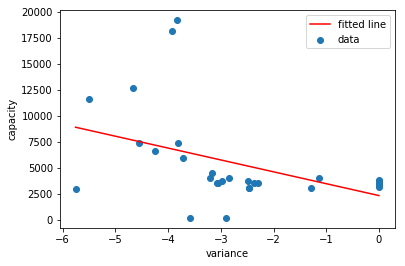

In [46]:
x = full_df["abs_variance_discharge_capacity_difference_cycles_2:100"]
#slope, intercept, r_value, p_value, std_err = stats.linregress(x, full_df[y])
plt.scatter(x, full_df[y], label="data")
plt.xlabel('variance')
plt.ylabel('capacity')
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, full_df[y], 1))(np.unique(x)), 'r', label="fitted line")
#plt.plot(np.unique(x), np.poly1d([slope, intercept])(np.unique(x)), 'r', label="fitted line")
plt.legend()
print("slope:", np.polyfit(x, full_df[y], 1)[0])

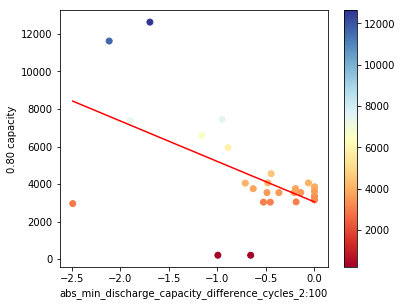

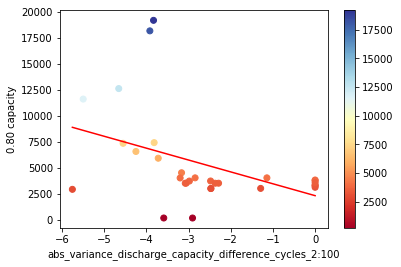

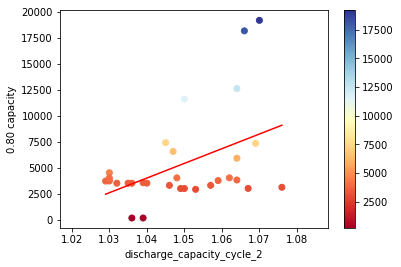

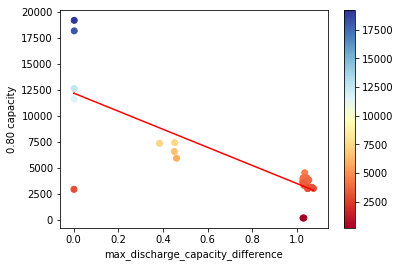

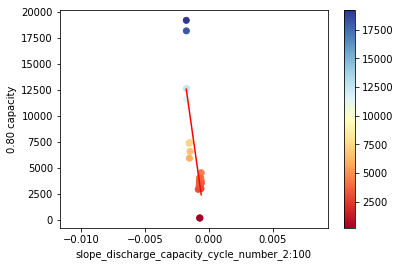

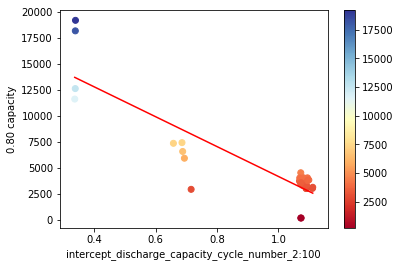

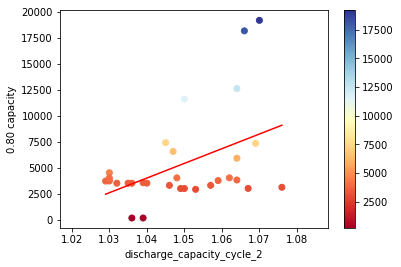

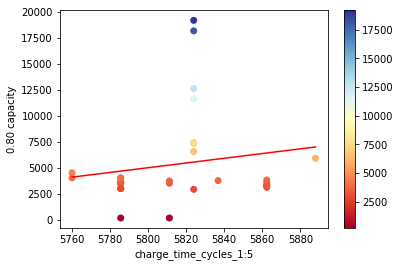

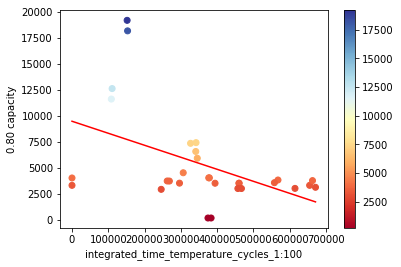

In [80]:
xvars = ['abs_min_discharge_capacity_difference_cycles_2:100',
         'abs_variance_discharge_capacity_difference_cycles_2:100',
         'discharge_capacity_cycle_2',
         'max_discharge_capacity_difference',
         'slope_discharge_capacity_cycle_number_2:100', 
         'intercept_discharge_capacity_cycle_number_2:100',
         'discharge_capacity_cycle_2',
         'charge_time_cycles_1:5',
         'integrated_time_temperature_cycles_1:100']
        
fig=plt.figure(figsize=(6, 50))
y = full_df["capacity_0.8"]
for i in range(len(xvars)): 
    x = full_df[xvars[i]].replace([np.inf, -np.inf], np.nan).dropna()
    y2 = y[x.index]
    fig.add_subplot(len(xvars), 1, i + 1)
    plt.xlabel(xvars[i])
    plt.ylabel('0.80 capacity')
    plt.scatter(x, y2, c=y2, cmap="RdYlBu")
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y2, 1))(np.unique(x)), 'r', label="fitted line")
    plt.colorbar()
    plt.show()

Plot below is very similar to the one in the paper.

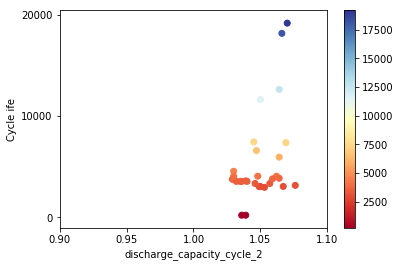

In [56]:
plt.xlabel('discharge_capacity_cycle_2')
plt.ylabel('Cycle ife')
plt.xlim([0.9, 1.1])
plt.yticks(np.arange(0, 20001, 10000))
plt.scatter(full_df['discharge_capacity_cycle_2'], full_df["capacity_0.8"], c=full_df["capacity_0.8"], cmap="RdYlBu")
plt.colorbar()

Look at the covariance matrix

In [57]:
import seaborn as sns
corr = full_df.iloc[: ,:18].corr()
full_df.iloc[: ,:18].corr()[full_df.iloc[: ,:18].corr().abs() >= .5]

,abs_first_discharge_capacity_difference_cycles_2:100,abs_kurtosis_discharge_capacity_difference_cycles_2:100,abs_mean_discharge_capacity_difference_cycles_2:100,abs_min_discharge_capacity_difference_cycles_2:100,abs_skew_discharge_capacity_difference_cycles_2:100,abs_variance_discharge_capacity_difference_cycles_2:100,charge_time_cycles_1:5,discharge_capacity_cycle_100,discharge_capacity_cycle_2,integrated_time_temperature_cycles_1:100,intercept_discharge_capacity_cycle_number_2:100,intercept_discharge_capacity_cycle_number_91:100,max_discharge_capacity_difference,max_temperature_cycles_1:100,min_temperature_cycles_1:100,nominal_capacity_by_median,slope_discharge_capacity_cycle_number_2:100,slope_discharge_capacity_cycle_number_91:100
abs_first_discharge_capacity_difference_cycles_2:100,1.000000,-0.857846,0.806162,NaN,-0.573099,0.795595,0.828018,NaN,0.574807,NaN,NaN,NaN,NaN,0.815320,0.879548,NaN,-0.677286,NaN
abs_kurtosis_discharge_capacity_difference_cycles_2:100,-0.857846,1.000000,-0.885222,-0.572634,0.815180,-0.896389,-0.735469,NaN,-0.741110,NaN,-0.620281,NaN,-0.514772,-0.819216,-0.859432,-0.553653,0.798750,NaN
abs_mean_discharge_capacity_difference_cycles_2:100,0.806162,-0.885222,1.000000,0.698460,-0.526459,0.909149,0.567258,NaN,NaN,NaN,NaN,NaN,NaN,0.666889,0.704615,NaN,NaN,NaN
abs_min_discharge_capacity_difference_cycles_2:100,NaN,-0.572634,0.698460,1.000000,NaN,0.884176,NaN,0.820163,NaN,0.504514,0.831899,0.822071,0.898777,NaN,NaN,0.823042,0.681470,NaN
abs_skew_discharge_capacity_difference_cycles_2:100,-0.573099,0.815180,-0.526459,NaN,1.000000,-0.566956,NaN,NaN,-0.685438,NaN,-0.589591,NaN,NaN,-0.539233,-0.505910,-0.537571,0.658778,NaN
abs_variance_discharge_capacity_difference_cycles_2:100,0.795595,-0.896389,0.909149,0.884176,-0.566956,1.000000,NaN,0.672832,NaN,0.607292,0.682783,0.677121,0.722830,0.590146,0.578910,0.676527,0.568224,-0.534902
charge_time_cycles_1:5,0.828018,-0.735469,0.567258,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.517941,0.632446,NaN,NaN,NaN
discharge_capacity_cycle_100,NaN,NaN,NaN,0.820163,NaN,0.672832,NaN,1.000000,NaN,0.519324,0.999503,0.999836,0.969387,NaN,NaN,0.999931,0.964563,NaN
discharge_capacity_cycle_2,0.574807,-0.741110,NaN,NaN,-0.685438,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.520199,NaN
integrated_time_temperature_cycles_1:100,NaN,NaN,NaN,0.504514,NaN,0.607292,NaN,0.519324,NaN,1.000000,0.528616,0.521968,0.514611,0.604000,0.650971,0.523061,NaN,NaN


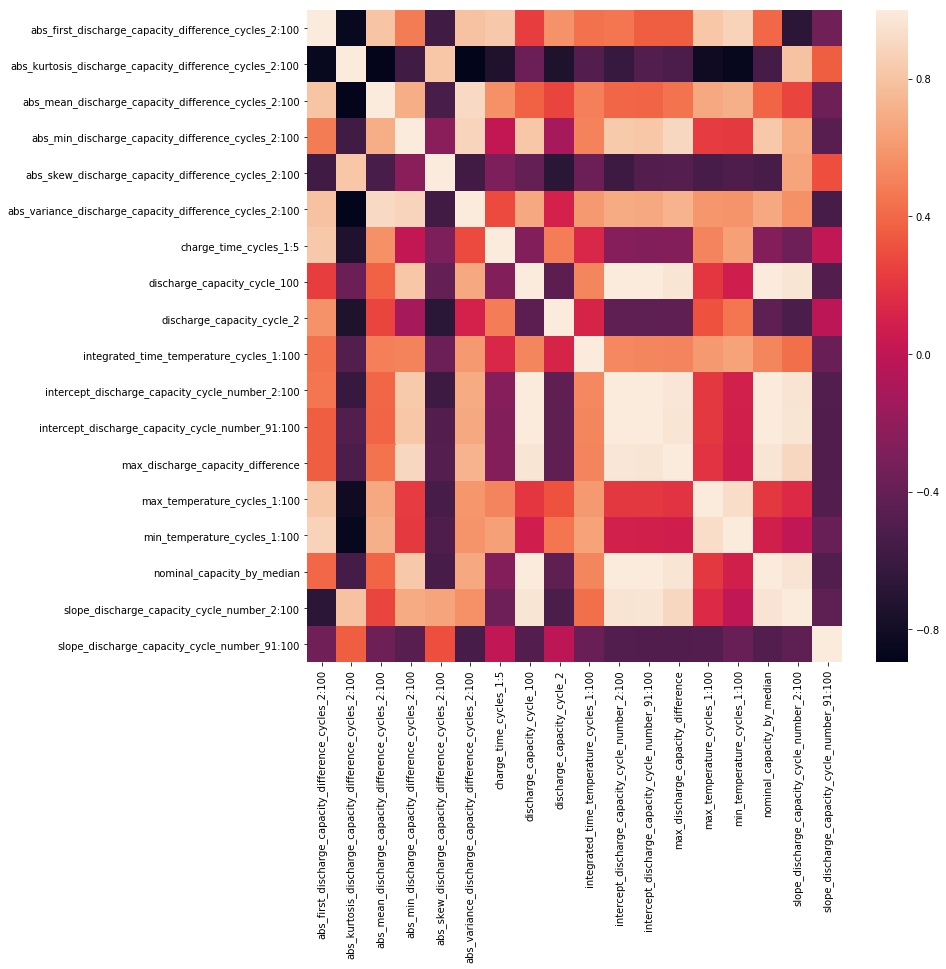

In [58]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [84]:
full_df.describe()

,abs_first_discharge_capacity_difference_cycles_2:100,abs_kurtosis_discharge_capacity_difference_cycles_2:100,abs_mean_discharge_capacity_difference_cycles_2:100,abs_min_discharge_capacity_difference_cycles_2:100,abs_skew_discharge_capacity_difference_cycles_2:100,abs_variance_discharge_capacity_difference_cycles_2:100,charge_time_cycles_1:5,discharge_capacity_cycle_100,discharge_capacity_cycle_2,integrated_time_temperature_cycles_1:100,...,nominal_capacity_by_median,slope_discharge_capacity_cycle_number_2:100,slope_discharge_capacity_cycle_number_91:100,capacity_0.8,capacity_0.83,capacity_0.86,capacity_0.89,capacity_0.92,capacity_0.95,capacity_0.98
count,21.000000,21.000000,30.000000,30.000000,21.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-1.573516,0.952933,-1.899986,-inf,0.241066,-2.644625,5814.613363,0.853433,1.049400,358201.829020,...,0.858617,-0.000933,-4.868687e-05,5364.600000,4996.266667,4552.733333,4456.133333,3587.933333,3313.300000,3309.100000
std,1.169325,0.769206,1.082864,NaN,0.381977,1.681988,33.434629,0.302302,0.014168,183621.519704,...,0.303662,0.000437,6.373299e-05,4460.213793,4718.373309,4987.393583,5043.153322,5371.089352,5455.535557,5457.880568
min,-3.309824,0.000000,-3.891418,-inf,-0.300394,-5.755608,5760.000000,0.220000,1.029000,0.000000,...,0.220000,-0.001767,-1.454545e-04,207.000000,205.000000,205.000000,205.000000,205.000000,126.000000,125.000000
25%,-2.451741,0.000000,-2.427977,-0.984659,0.000000,-3.792498,5785.600098,0.606750,1.036750,264044.744786,...,0.613500,-0.001313,-9.696970e-05,3341.000000,3040.000000,257.000000,257.000000,257.000000,257.000000,238.750000
50%,-1.844457,1.142065,-2.216561,-0.485067,0.057256,-2.944010,5817.600098,1.028000,1.048500,360198.054427,...,1.032000,-0.000722,-1.511852e-17,3756.500000,3549.500000,3543.500000,3543.500000,506.000000,506.000000,506.000000
75%,0.000000,1.529175,-1.741497,-0.153390,0.584775,-1.540686,5824.000000,1.040750,1.063500,460753.826507,...,1.046250,-0.000626,-2.476409e-18,5595.500000,5595.500000,5595.500000,5595.500000,5346.000000,5197.500000,5197.500000
max,0.000000,2.349816,0.000000,0.000000,0.993881,0.000000,5888.000000,1.059000,1.076000,671446.618667,...,1.067000,-0.000595,9.696970e-05,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000


## Reading in Old Data

In [124]:
#d_dir = '/../Toyota/features/DeltaQFastCharge' # Directory for DeltaQFastCharge
d_dir = 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/DeltaQFastCharge' # Directory for DeltaQFastCharge
t_dir = 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/TrajectoryFastCharge' # Directory for TrajectoryFastCharge
#t_dir = './Toyota/features/TrajectoryFastCharge' # Directory for TrajectoryFastCharge

In [125]:
def getListOfFiles(dirName):
    listOfFile = os.listdir(dirName)
    allFiles = list()
    for entry in listOfFile:
        fullPath = os.path.join(dirName, entry)
        if ".json" in fullPath:
            allFiles.append(fullPath)
    return allFiles

Getting Features

In [126]:
d_list = getListOfFiles(d_dir)
print(len(d_list))
d_list

139


['C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/DeltaQFastCharge\\FastCharge_000000_CH19_features_DeltaQFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/DeltaQFastCharge\\FastCharge_000001_CH16_features_DeltaQFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/DeltaQFastCharge\\FastCharge_000001_CH30_features_DeltaQFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/DeltaQFastCharge\\FastCharge_000001_CH38_features_DeltaQFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/DeltaQFastCharge\\FastCharge_000002_CH10_features_DeltaQFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/DeltaQFastCharge\\FastCharge_000002_CH18_features_DeltaQFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/DeltaQFastCharge\\FastCharge_000002_CH2_features_DeltaQFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/Del

In [127]:
new_names = []
for file in d_list:
    new_names.append(re.findall("CH(.*?)\_f", file)[0])
# new_names

In [128]:
d_df = pd.DataFrame()
for file in d_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        d_df = pd.concat([d_df,data_df])
d_df.reset_index(drop=True,inplace=True)
d_df['bat_num'] = new_names
d_df.head()

,@module,@class,name,@version,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,...,X.internal_resistance_difference_cycles_2:100,X.nominal_capacity_by_median,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.init_pred_cycle,metadata.parameters.mid_pred_cycle,metadata.parameters.final_pred_cycle,metadata.parameters.n_nominal_cycles,bat_num
0,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0454259],[0.8891461000000003],[1.0331815],[231072.4263671875],[614.4000244140625],[-1.1444158302992298],...,[-0.0010415539145469666],[1.047977],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,10,91,100,40,19
1,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0620247999999999],[0.48970650000000004],[1.0439155],[149767.85131961218],[563.2000122070312],[-1.2773591296554208],...,[0.0003414759412407875],[1.06011365],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,10,91,100,40,16
2,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0678786],[0.4961450999999999],[1.054091],[205315.4877278646],[614.4000244140625],[-1.3752393675218624],...,[0.00024036318063735962],[1.06736225],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,10,91,100,40,30
3,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0512739],[0.49011190000000004],[1.0341983000000001],[159799.4890051929],[563.2000122070312],[-1.2430890844325302],...,[0.00042933784425258636],[1.05098615],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,10,91,100,40,38
4,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1.0665728],[0.47571469999999993],[1.0695093],[146029.5250360061],[614.4000244140625],[-1.640443517452452],...,[-0.0001586293801665306],[1.0708095],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,10,91,100,40,10


In [129]:
batches = []
for i in d_df['metadata.protocol']:
    if '2017-05' in i:
        batches.append('b1')
    elif '2017-06' in i:
        batches.append('b2')
    elif '2018-04' in i:
        batches.append('b3')
# batches

In [130]:
d_df['batches'] = batches
d_df['bat_name'] = d_df['batches'] + 'c' + d_df['bat_num']

In [131]:
d_df['bat_name']

0      b2c19
1      b3c16
2      b3c30
3      b3c38
4      b3c10
       ...  
134    b2c25
135    b2c46
136    b2c40
137    b2c34
138    b2c35
Name: bat_name, Length: 139, dtype: object

Response variable data

In [132]:
t_list = getListOfFiles(t_dir)
print(len(t_list))
t_list

139


['C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/TrajectoryFastCharge\\FastCharge_000000_CH19_features_TrajectoryFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/TrajectoryFastCharge\\FastCharge_000001_CH16_features_TrajectoryFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/TrajectoryFastCharge\\FastCharge_000001_CH30_features_TrajectoryFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/TrajectoryFastCharge\\FastCharge_000001_CH38_features_TrajectoryFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/TrajectoryFastCharge\\FastCharge_000002_CH10_features_TrajectoryFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/TrajectoryFastCharge\\FastCharge_000002_CH18_features_TrajectoryFastCharge.json',
 'C:/Users/mattm/Documents/CalPoly/DATA 451/Toyota/features/TrajectoryFastCharge\\FastCharge_000002_CH2_features_TrajectoryFastCharge.json',
 'C:/Us

In [133]:
t_df = pd.DataFrame()
for file in t_list:
    with open(file) as data_file:    
        data = json.load(data_file)
        data_df = pd.json_normalize(data)
        t_df = pd.concat([t_df,data_df])
t_df.reset_index(inplace=True)
t_df.head()

,index,@module,@class,name,@version,X.capacity_0.98,X.capacity_0.95,X.capacity_0.92,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode,metadata.protocol,metadata.channel_id,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[127],[269],[376],[423],[449],[467],[483],el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,0.98,0.78,0.03
1,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[125],[276],[426],[528],[613],[668],[668],el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,0.98,0.78,0.03
2,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[774],[774],[774],[774],[774],[774],[774],el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,0.98,0.78,0.03
3,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[543],[543],[543],[543],[543],[543],[543],el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,0.98,0.78,0.03
4,0,beep.featurize,TrajectoryFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,[1011],[1011],[1011],[1011],[1011],[1011],[1011],el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,0.98,0.78,0.03


In [134]:
df_full = d_df.merge(t_df, left_index=True, right_index=True)

# Making values not stored as lists
for column in df_full.columns:
    if "X." in column:
        df_full[column] = df_full[column].apply(lambda x: x[0])

#df_full.sort_values(by=['bat_name'],inplace=True)
df_full.reset_index(inplace=True)
df_full

,level_0,@module_x,@class_x,name_x,@version_x,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,...,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.barcode_y,metadata.protocol_y,metadata.channel_id_y,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
0,0,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.045426,0.889146,1.033181,231072.426367,614.400024,...,423,449,467,483,el150800440551,2017-06-30_tests\20170630-4_4C_55per_6C.sdu,18,0.98,0.78,0.03
1,1,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.062025,0.489707,1.043915,149767.851320,563.200012,...,528,613,668,668,el150800737229,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,15,0.98,0.78,0.03
2,2,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.067879,0.496145,1.054091,205315.487728,614.400024,...,774,774,774,774,el150800737366,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,29,0.98,0.78,0.03
3,3,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.051274,0.490112,1.034198,159799.489005,563.200012,...,543,543,543,543,el150800737234,2018-04-12_batch8\20180412-3_7C_31per_5_9C_new...,37,0.98,0.78,0.03
4,4,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.066573,0.475715,1.069509,146029.525036,614.400024,...,1011,1011,1011,1011,el150800737329,2018-04-12_batch8\20180412-5C_67per_4C_newstru...,9,0.98,0.78,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,134,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.068216,0.887755,1.076756,233369.177230,588.799988,...,250,483,503,522,el150800460610,2017-06-30_tests\20170630-4_9C_61per_4_5C.sdu,24,0.98,0.78,0.03
135,135,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.066163,0.886750,1.073273,231731.725590,640.000000,...,443,462,480,497,el150800460613,2017-06-30_tests\20170630-6C_4per_4_75C.sdu,45,0.98,0.78,0.03
136,136,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.074378,0.888332,1.086167,228614.760124,614.400024,...,420,435,449,464,el150800460627,2017-06-30_tests\20170630-5_6C_58per_3_5C.sdu,39,0.98,0.78,0.03
137,137,beep.featurize,DeltaQFastCharge,/mnt/c/Users/sjrt1/Documents/School/Winter2021...,2021.1.11.15,1.075889,0.892131,1.084460,234874.822253,588.799988,...,472,491,509,527,el150800460641,2017-06-30_tests\20170630-5_2C_58per_4C.sdu,33,0.98,0.78,0.03


In [135]:
df_full.to_csv("OldDataFastCharge.csv", index=False)

## Comparing Old to New

In [136]:
df_full.describe()

,level_0,X.discharge_capacity_cycle_2,X.max_discharge_capacity_difference,X.discharge_capacity_cycle_100,X.integrated_time_temperature_cycles_1:100,X.charge_time_cycles_1:5,X.abs_min_discharge_capacity_difference_cycles_2:100,X.abs_mean_discharge_capacity_difference_cycles_2:100,X.abs_variance_discharge_capacity_difference_cycles_2:100,X.abs_skew_discharge_capacity_difference_cycles_2:100,...,X.capacity_0.95,X.capacity_0.92,X.capacity_0.89,X.capacity_0.86,X.capacity_0.83,X.capacity_0.8,metadata.channel_id_y,metadata.parameters.thresh_max_cap,metadata.parameters.thresh_min_cap,metadata.parameters.interval_cap
count,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,...,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.00000,1.390000e+02,1.390000e+02,139.00
mean,69.000000,1.066716,0.648403,1.068987,203266.149729,627.292087,-1.462339,-1.824176,-3.647785,-1.143400,...,681.798561,727.705036,754.446043,786.194245,806.064748,817.258993,23.76259,9.800000e-01,7.800000e-01,0.03
std,40.269923,0.014470,0.172732,0.020894,27575.600490,59.311065,0.245995,0.311403,0.480385,0.502347,...,390.479809,394.374729,391.882417,376.795237,365.311703,360.679418,13.94429,2.228477e-16,1.114238e-16,0.00
min,0.000000,0.972064,0.120014,0.926753,138138.188029,512.000000,-2.241669,-3.178515,-4.927913,-3.241596,...,71.000000,94.000000,114.000000,132.000000,147.000000,161.000000,0.00000,9.800000e-01,7.800000e-01,0.03
25%,34.500000,1.064034,0.495772,1.064831,184444.691056,588.799988,-1.593513,-1.958635,-3.930902,-1.384536,...,366.000000,413.000000,441.500000,472.500000,491.500000,509.000000,12.00000,9.800000e-01,7.800000e-01,0.03
50%,69.000000,1.068637,0.607691,1.072925,210685.026872,614.400024,-1.447962,-1.788406,-3.624052,-1.080302,...,633.000000,708.000000,753.000000,788.000000,788.000000,790.000000,24.00000,9.800000e-01,7.800000e-01,0.03
75%,103.500000,1.074320,0.881451,1.080273,227168.652169,640.000000,-1.292032,-1.612972,-3.290318,-0.849533,...,901.500000,917.000000,935.500000,960.500000,993.500000,1007.500000,36.00000,9.800000e-01,7.800000e-01,0.03
max,138.000000,1.091760,0.899209,1.095874,238273.920658,819.200012,-0.734844,-1.105349,-2.221331,-0.028145,...,1937.000000,2127.000000,2239.000000,2239.000000,2239.000000,2239.000000,47.00000,9.800000e-01,7.800000e-01,0.03


In [138]:
full_df.describe()

,abs_first_discharge_capacity_difference_cycles_2:100,abs_kurtosis_discharge_capacity_difference_cycles_2:100,abs_mean_discharge_capacity_difference_cycles_2:100,abs_min_discharge_capacity_difference_cycles_2:100,abs_skew_discharge_capacity_difference_cycles_2:100,abs_variance_discharge_capacity_difference_cycles_2:100,charge_time_cycles_1:5,discharge_capacity_cycle_100,discharge_capacity_cycle_2,integrated_time_temperature_cycles_1:100,...,nominal_capacity_by_median,slope_discharge_capacity_cycle_number_2:100,slope_discharge_capacity_cycle_number_91:100,capacity_0.8,capacity_0.83,capacity_0.86,capacity_0.89,capacity_0.92,capacity_0.95,capacity_0.98
count,21.000000,21.000000,30.000000,30.000000,21.000000,30.000000,30.000000,30.000000,30.000000,30.000000,...,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,-1.573516,0.952933,-1.899986,-inf,0.241066,-2.644625,5814.613363,0.853433,1.049400,358201.829020,...,0.858617,-0.000933,-4.868687e-05,5364.600000,4996.266667,4552.733333,4456.133333,3587.933333,3313.300000,3309.100000
std,1.169325,0.769206,1.082864,NaN,0.381977,1.681988,33.434629,0.302302,0.014168,183621.519704,...,0.303662,0.000437,6.373299e-05,4460.213793,4718.373309,4987.393583,5043.153322,5371.089352,5455.535557,5457.880568
min,-3.309824,0.000000,-3.891418,-inf,-0.300394,-5.755608,5760.000000,0.220000,1.029000,0.000000,...,0.220000,-0.001767,-1.454545e-04,207.000000,205.000000,205.000000,205.000000,205.000000,126.000000,125.000000
25%,-2.451741,0.000000,-2.427977,-0.984659,0.000000,-3.792498,5785.600098,0.606750,1.036750,264044.744786,...,0.613500,-0.001313,-9.696970e-05,3341.000000,3040.000000,257.000000,257.000000,257.000000,257.000000,238.750000
50%,-1.844457,1.142065,-2.216561,-0.485067,0.057256,-2.944010,5817.600098,1.028000,1.048500,360198.054427,...,1.032000,-0.000722,-1.511852e-17,3756.500000,3549.500000,3543.500000,3543.500000,506.000000,506.000000,506.000000
75%,0.000000,1.529175,-1.741497,-0.153390,0.584775,-1.540686,5824.000000,1.040750,1.063500,460753.826507,...,1.046250,-0.000626,-2.476409e-18,5595.500000,5595.500000,5595.500000,5595.500000,5346.000000,5197.500000,5197.500000
max,0.000000,2.349816,0.000000,0.000000,0.993881,0.000000,5888.000000,1.059000,1.076000,671446.618667,...,1.067000,-0.000595,9.696970e-05,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000,19174.000000
